In [2]:
from sympy import *
from sympy.plotting import plot3d
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2024-11-18 19:32:37.077624: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-18 19:32:37.111552: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-18 19:32:37.111581: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-18 19:32:37.114076: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-18 19:32:37.119987: I tensorflow/core/platform/cpu_feature_gua

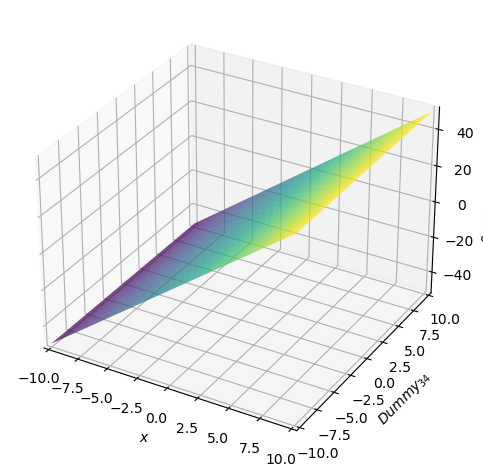

In [3]:
x,y = symbols('x y')
f=2*x + 3*x
plot3d(f);

In [4]:
x=symbols('x')
expr=x**2 / x**5
print(expr)

x**(-3)


**Task**  
You loan 100$ with 20% interest annualy.Interest rate compaunded monthly thus =0.20/12
How much will be the loan after two years

**Variables**  
A: balance(i.e. total loan agter two years)  
P: starting investment(i.e. your initial amount of loan)  
r: interest rate  
t: time span(i.e. timespan- total period of loan)  
n: number of month in timespan  
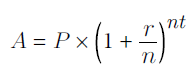

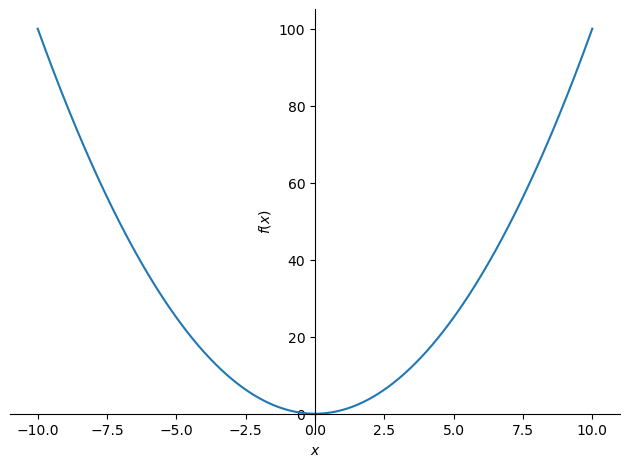

In [5]:
x=symbols('x')
f=x**2
plot(f)

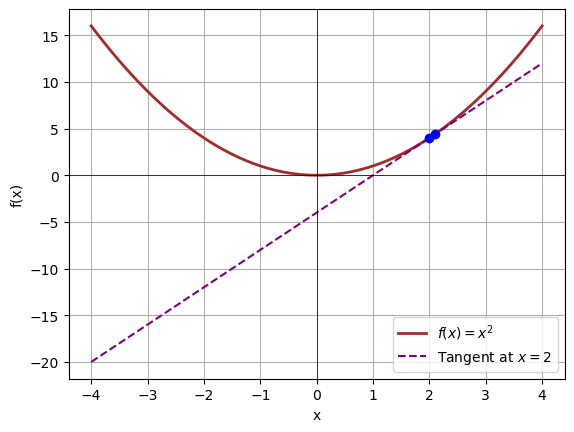

In [6]:
x = symbols('x')
f = x**2

x0 = 2

f_x0 = f.subs(x, x0)
f_prime = diff(f, x)
slope = f_prime.subs(x, x0)

tangent_line = slope * (x - x0) + f_x0

f_numeric = lambdify(x, f, "numpy")
tangent_numeric = lambdify(x, tangent_line, "numpy")

x_vals = np.linspace(-4, 4, 100)
y_vals = f_numeric(x_vals)
tangent_vals = tangent_numeric(x_vals)

plt.plot(x_vals, y_vals, label='$f(x) = x^2$', color="brown", linewidth=2)
plt.plot(x_vals, tangent_vals, label='Tangent at $x = 2$', color="purple", linestyle="--", linewidth=1.5)

plt.scatter([x0, x0 + 0.1], [f_numeric(x0), f_numeric(x0 + 0.1)], color="blue", zorder=5)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()

## Derivateive calculator

In [7]:
def derivative_x(f,x,step_size):
    m=(f(x + step_size) - f(x)) / ((x+step_size) -x)
    return m

def my_func(x):
    return x**2

slope_at_2= derivative_x(my_func, 2, 1e-5)

In [8]:
x=symbols('x')
f=x**2
dx_f=diff(f)
print(dx_f)

2*x


dx_f:6*x**2, dy_f:9*y**2


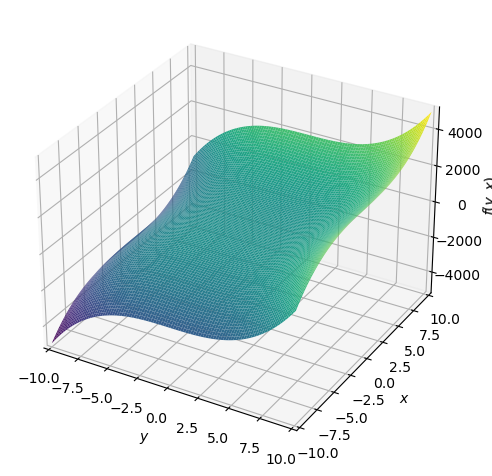

In [9]:
x,y=symbols('x y')
f=2*x**3 + 3*y**3

dx_f=diff(f,x)
dy_f=diff(f,y)

print(f'dx_f:{dx_f}, dy_f:{dy_f}')

plot3d(f)

In [10]:
x, y=symbols('x y')

_y= x**2 + 1
dy_dx= diff(_y)

z= y**3 - 2
dz_dy = diff(z)

dz_dx_chain= (dy_dx * dz_dy).subs(y, _y)
dz_dx_no_chain = diff(z.subs(y,_y))

print(dz_dx_chain)
print(dz_dx_no_chain)

6*x*(x**2 + 1)**2
6*x*(x**2 + 1)**2


## Vectors

In [11]:
import numpy as np

row_vec=np.array([[1,2,3]])
col_vec=np.array([[1],[2],[3]])

In [12]:
s=2.0
b=np.array([3,4,5])
print(b*s)

[ 6.  8. 10.]


## Integrals

### Manual approach

In [13]:
%%time

def approximate_integral(a, b,n ,f):
    '''
    Args:
        a: x axis range minima
        b: x axis range maxima
        n: number of rectangles
        f: integrating function
    '''

    delta_x = (b - a) / n
    total_sum = 0

    for i in range(1, n+1):
        midpoint= .5 * (2 * a + delta_x * (2 *i - 1))
        total_sum += f(midpoint)

    return total_sum * delta_x

def my_function(x):
    return x**2 +1

area = approximate_integral(a=0, b=1, n=100_000_000, f=my_function)
print(f'Area:{ area}')

Area:1.3333333333340978
CPU times: user 13.4 s, sys: 2.32 ms, total: 13.4 s
Wall time: 13.4 s


### SymPy approach

In [14]:
%%time
x= symbols('x')
f=x**2 + 1

area = integrate(f, (x, 0, 1))
print(f'Area: {area}')

Area: 4/3
CPU times: user 25.1 ms, sys: 0 ns, total: 25.1 ms
Wall time: 35.4 ms


### SymPy with limits

In [15]:
%%time
x, i, n = symbols('x i n')

f= x**2 + 1
lower, upper = 0, 1
# determine length of each rectangle
delta_x = ((upper - lower) / n)

# Calculate width and each rectangle height at index i
x_i = (lower + delta_x * i)
fx_i = f.subs(x, x_i)

#Iterate all n recangles and sum their areas
n_rectangles= Sum(delta_x * fx_i, (i, 1, n)).doit()

# Calculate the area by approaching the number of rectangles n to infinity
area=limit(n_rectangles, n, oo)

print(f'Area: {area}')

Area: 4/3
CPU times: user 103 ms, sys: 0 ns, total: 103 ms
Wall time: 114 ms


# Statistics

## Distributions

#### Variance

variance is the measure of how spread out our data is

$
\sigma^2 = \frac{\sum \left( x_i - \mu \right)^2}{N}   \text{i.e.} \text{variance} = \frac{(x_1 - \text{mean})^2 + (x_2 - \text{mean})^2 + \dots + (x_n - \text{mean})^2}{N}
$

In [16]:
data= [0,1,2,3,4,5,6,7,8]

def variance(val):
    mean= sum(val) / len(val)
    _variance = sum((v - mean) **2 for v in val) / len(val)
    return _variance

print(variance(data))

6.666666666666667


#### Standard Deviation

Standard deviation is the square rooted variance, and because of that it represents more meaningfull values spreaded out around mean

$
\sigma = \sqrt\frac{\sum \left( x_i - \mu \right)^2}{N} 
$

In [17]:
from math import sqrt

def std_dev(val):
    return sqrt(variance(data))

print(std_dev(data))

2.581988897471611


#### Normal Distribution

In [18]:
# Generating random numbers with weights from a normal distribution

import random
from scipy.stats import norm

for i in range(0,1000):
    random_p= random.uniform(0.0, 1.0)
    random_weight= norm.ppf(random_p, loc=64.43, scale=2.99)
    print(random_weight)

65.00807360641562
61.664961224934984
63.71653396382868
65.22244808334464
71.17024345174451
64.7576963937305
62.27502167312834
57.50812648603274
60.667612606796816
63.003127231078295
62.01549530806183
63.30535573913499
65.59934080601111
62.93087156940479
61.03970184277437
68.25349481394825
63.865205317858276
59.31522100049243
61.24877406834044
60.390440643147166
68.78183033616685
63.701256280280525
65.919003050261
62.95803904456519
69.01591103438345
60.31633778475117
65.36470891655696
62.36667321433368
64.56010572634042
65.2718831050201
67.1359993870989
64.48227530600758
64.57118378388523
66.77530921690717
60.51719897441152
64.44241026721733
61.5154767512691
67.81869123055073
71.84616253614516
67.51243022671358
65.72642581357147
62.419955056969236
60.91865902704192
59.12961990293597
67.3427344823382
64.07391702176548
67.97761641296663
65.18444800046409
63.44633652028243
65.22525091868589
64.59689666726761
59.92156923433602
59.038184523531
59.67484220883976
70.05103969139175
63.787200728

#### PDF (Probability Density Function)

The PDF describes the likelihood of a continious random variable taking on a specific range of values

$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e{-\frac{1}{2}} \left( \frac{x - \mu^2}{\sigma} \right)
$

In [19]:
def mormal_pdf(x: float, mean: float, std_dev: float) -> float:
    return (1.0 / (2.0 * math.pi * std_dev **2) ** 0.5) * math.exp(-1.0 * ((x - mean) **2 / (2.0 * std_dev **2)))

#### CDF (Cumulative Distribution Function)

CDF provides the area up to a given x-value for a given distribution.

<img src="./images/pdf-cdf.png" width="350" />

In [20]:
from scipy.stats import norm
mean = 64.43
std_dev = 2.99
x = norm.cdf(64.43, mean, std_dev)

2024-11-18 19:32:55.845171: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-18 19:32:55.982664: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-18 19:32:55.982718: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-18 19:32:55.987296: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-18 19:32:55.987361: I external/local_xla/xla/stream_executor

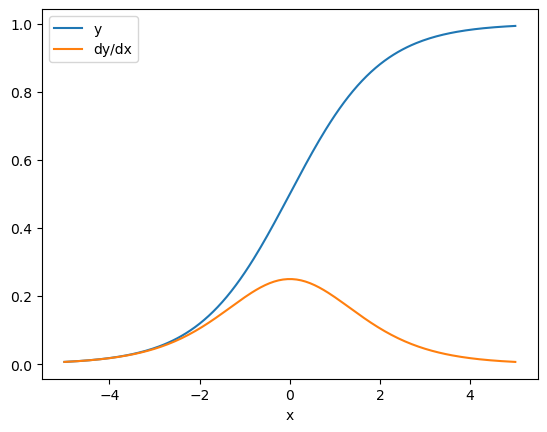

In [21]:
# 201 datapoints in rank-0 tenzor with equal distribution
x= tf.linspace(-5.0,5.0,200+1)

with tf.GradientTape() as tape:
    tape.watch(x)
    y= tf.nn.sigmoid(x)

grad_y_x= tape.gradient(y,x)

plt.plot(x,y, label='y')
plt.plot(x, grad_y_x,label='dy/dx')
plt.legend()
_=plt.xlabel('x')
plt.grid=True

# Matrices

In [22]:
# System of equations
# 4x + 2y + 4z = 44
# 5x + 3y + 7z = 56
# 9x + 3y + 6z = 72

A= Matrix(
    [
        [4,2,4],
        [5,3,7],
        [9,3,6]
    ]
)

inverse= A.inv()
identity= inverse * A
print("INVERSE: {}".format(inverse))

INVERSE: Matrix([[-1/2, 0, 1/3], [11/2, -2, -4/3], [-2, 1, 1/3]])


# Linear Regression

<img src="./images/lr.png" width="350" />

m= [1.93939394]
b= [4.73333333]


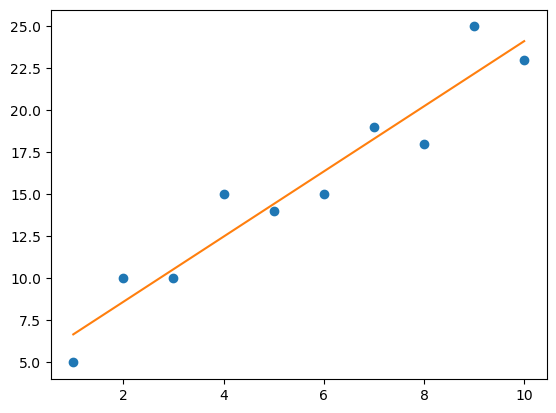

In [34]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

df= pd.read_csv('https://bit.ly/3goOAnt', delimiter=',')

# Extract Input Variables  all rows all columns except last colums
X= df.values[:,:-1]

# Extract output column(all rows, last column)
y= df.values[:,-1]

# fit a line to the points
fit= LinearRegression().fit(X,y)

m= fit.coef_.flatten()
b= fit.intercept_.flatten()
print('m= {0}'.format(m))
print('b= {0}'.format(b))

# plot Scatterplot
plt.plot(X,y,'o')

# plot line
plt.plot(X, m*X+b)

plt.show()

## Linear residuals

In [26]:
# Calcuate residuals
points = pd.read_csv('https://bit.ly/3goOAnt', delimiter=',').itertuples()

for p in points:
    y_actual = p.y
    y_pred= m*p.x +b
    resid= y_actual - y_pred
    print(resid)

[-1.67272727]
[1.38787879]
[-0.55151515]
[2.50909091]
[-0.43030303]
[-1.36969697]
[0.69090909]
[-2.24848485]
[2.81212121]
[-1.12727273]


## Square residuals

<img src="./images/lr_sqr.png" width="450" />

In [27]:
# Calcuate residuals
points = pd.read_csv('https://bit.ly/3goOAnt', delimiter=',').itertuples()

sum_of_sqr= 0.0

for p in points:
    y_actual= p.y
    y_pred= m*p.x + b
    resid_sqr= (y_actual - y_pred)**2
    sum_of_sqr+=resid_sqr

print('sum of squares: {0}'.format(sum_of_sqr))

sum of squares: [28.0969697]


## Finding the best fit line

**Closed formula**
<div style="font-size:24px">
$m = \frac{n\Sigma xy - \Sigma x \Sigma y}{n\Sigma x^2 - (\Sigma x)^2}$

$b = \frac{\Sigma y}{n} - m \frac{\Sigma x}{n}$
</div>

In [35]:
points = list(pd.read_csv('https://bit.ly/3goOAnt', delimiter=',').itertuples())

n= len(points)

m_manual= (n*sum(p.x * p.y for p in points) - sum(p.x for p in points) * sum(p.y for p in points) 
   ) / ( 
   n*sum(p.x**2 for p in points) - (sum(p.x for p in points)**2) )

b_manual= (sum(p.y for p in points) / n) - m * (sum(p.x for p in points) / n)
print(m,b)
print(m_manual, b_manual)

[1.93939394] [4.73333333]
1.9393939393939394 [4.73333333]


In [36]:
points

[Pandas(Index=0, x=1, y=5),
 Pandas(Index=1, x=2, y=10),
 Pandas(Index=2, x=3, y=10),
 Pandas(Index=3, x=4, y=15),
 Pandas(Index=4, x=5, y=14),
 Pandas(Index=5, x=6, y=15),
 Pandas(Index=6, x=7, y=19),
 Pandas(Index=7, x=8, y=18),
 Pandas(Index=8, x=9, y=25),
 Pandas(Index=9, x=10, y=23)]

**REFERENCES**

https://www.youtube.com/watch?v=YX40hbAHx3s  
https://www.youtube.com/watch?v=Q_1M2JaijjQ